<a href="https://colab.research.google.com/github/yongjulee0213/ale_python_interface/blob/master/C2_W1_Lab_1_cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#insall this package to use Colab's GPU for training
!apt install --allow-change-held-packages libcudnn8=8.4.1.50-1+cuda11.6

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be upgraded:
  libcudnn8
1 upgraded, 0 newly installed, 1 to remove and 18 not upgraded.
Need to get 420 MB of archives.
After this operation, 3,369 MB disk space will be freed.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  libcudnn8 8.4.1.50-1+cuda11.6 [420 MB]
Fetched 420 MB in 9s (45.4 MB/s)
(Reading database ... 157604 files and directories currently installed.)
Removing libcudnn8-dev (8.0.5.39-1+cuda11.1) ...
(Reading database ... 157582 files and directories currently installed.)
Preparing to unpack .../libcudnn8_8.4.1.50-1+cuda11.6_amd64.deb ...
Unpacking libcudnn8 (8.4.1.50-1+c

In [2]:
#download data
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-09-26 03:57:35--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 173.194.210.128, 173.194.214.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   265MB/s    in 0.2s    

2022-09-26 03:57:35 (265 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [4]:
#unzip
import zipfile

local_zip='/content/cats_and_dogs_filtered.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall()
zip_ref.close()

In [5]:
#디렉토리의 하위 디렉토리까지 출력
import os
base_dir='/content/cats_and_dogs_filtered'

print("Contents of base directory:")
print(os.listdir(base_dir))

#training
print('\nContents of train directory:')
print(os.listdir(f'{base_dir}/train'))

#validation
print('\nContents of validation directory:')
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['vectorize.py', 'train', 'validation']

Contents of train directory:
['dogs', 'cats']

Contents of validation directory:
['dogs', 'cats']


In [7]:
#훈련용과 밸리데이션용 각각 나누기
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')

#훈련용을 다시 개와 고양이로 나누기
train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')

#validation data for dogs and cats
vali_cats_dir=os.path.join(validation_dir,'cats')
vali_dogs_dir=os.path.join(validation_dir,'dogs')

In [9]:
#the name of label==the name of dir for training
train_cats_fnames=os.listdir(train_cats_dir)
train_dogs_fnames=os.listdir(train_dogs_dir)

print(train_cats_fnames[:10])
print(train_dogs_fnames[:10])

['cat.382.jpg', 'cat.841.jpg', 'cat.492.jpg', 'cat.763.jpg', 'cat.554.jpg', 'cat.908.jpg', 'cat.821.jpg', 'cat.591.jpg', 'cat.387.jpg', 'cat.631.jpg']
['dog.594.jpg', 'dog.86.jpg', 'dog.492.jpg', 'dog.969.jpg', 'dog.370.jpg', 'dog.522.jpg', 'dog.707.jpg', 'dog.545.jpg', 'dog.491.jpg', 'dog.828.jpg']


In [10]:
#the number of total dataset
print('total training cats : ',len(os.listdir(train_cats_dir)))
print('total training dogs : ',len(os.listdir(train_dogs_dir)))
print('total validation cats : ',len(os.listdir(vali_cats_dir)))
print('total validation cats : ',len(os.listdir(vali_dogs_dir)))

total training cats :  1000
total training dogs :  1000
total validation cats :  500
total validation cats :  500


In [12]:
#이미지 몇개 출력해보기
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows=4
ncols=4

pic_index=0

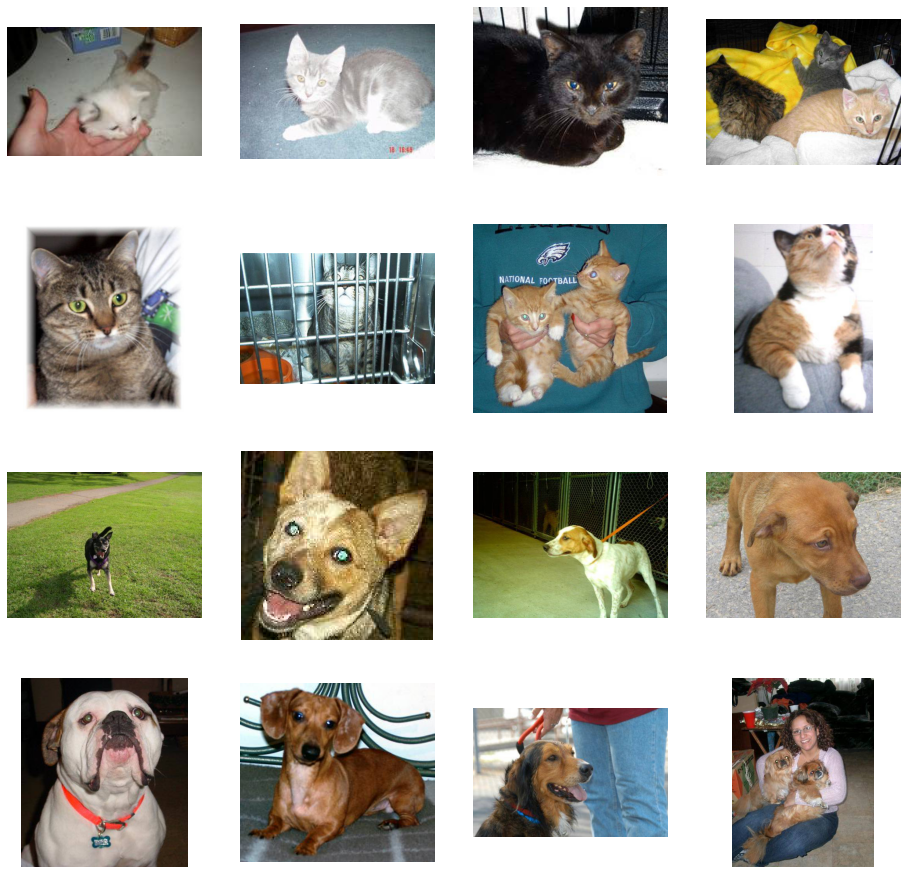

In [14]:
fig=plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)

pic_index+=8 
next_cat_pix=[os.path.join(train_cats_dir,fname)
              for fname in train_cats_fnames[pic_index-8:pic_index]
              ]
next_dog_pix=[os.path.join(train_dogs_dir,fname)
              for fname in train_dogs_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp=plt.subplot(nrows, ncols,i+1)
  sp.axis('off')

  img=mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [22]:
#build the model
import tensorflow as tf

model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 64)       0

In [45]:
#compile
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',optimizer=RMSprop(learning_rate=0.001),metrics=['accuracy'])

In [46]:
#make generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

train_generator=train_datagen.flow_from_directory(train_dir, batch_size=20, class_mode='binary',target_size=(150,150))
vali_generator=test_datagen.flow_from_directory(validation_dir, batch_size=20, class_mode='binary',target_size=(150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [49]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy')>0.999:
      print("\nreached 99.% accuarcy so cancelling training")
      self.model.stop_training=True

In [51]:
#training
callbacks=myCallback()
history=model.fit(
    train_generator,
    epochs=15,
    validation_data=vali_generator,
    verbose=1,
    callbacks=callbacks)

Epoch 1/15
100/100 [==============================] - 67s 667ms/step - loss: 0.5654 - accuracy: 0.7080 - val_loss: 0.6583 - val_accuracy: 0.6050
Epoch 2/15
100/100 [==============================] - 65s 653ms/step - loss: 0.4991 - accuracy: 0.7555 - val_loss: 0.6122 - val_accuracy: 0.6500
Epoch 3/15
100/100 [==============================] - 67s 671ms/step - loss: 0.4397 - accuracy: 0.7970 - val_loss: 0.5843 - val_accuracy: 0.6960
Epoch 4/15
100/100 [==============================] - 65s 650ms/step - loss: 0.3687 - accuracy: 0.8335 - val_loss: 0.6207 - val_accuracy: 0.7210
Epoch 5/15
100/100 [==============================] - 65s 650ms/step - loss: 0.2770 - accuracy: 0.8760 - val_loss: 0.6979 - val_accuracy: 0.7020
Epoch 6/15
100/100 [==============================] - 68s 682ms/step - loss: 0.1904 - accuracy: 0.9185 - val_loss: 0.8187 - val_accuracy: 0.6910
Epoch 7/15
100/100 [==============================] - 65s 650ms/step - loss: 0.1414 - accuracy: 0.9415 - val_loss: 1.0923 - val_ac

In [54]:
#make prediction
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
  path='/content/'+fn
  img=image.load_img(path,target_size=(150,150))

  x=image.img_to_array(img)
  x/=255
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])

  classes=model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0.5:
    print(fn+" is a dog")
  else:
    print(fn+ " is a cat")

Saving KakaoTalk_20220926_135254653_01.jpg to KakaoTalk_20220926_135254653_01.jpg
Saving KakaoTalk_20220926_135254653_02.jpg to KakaoTalk_20220926_135254653_02.jpg
Saving KakaoTalk_20220926_135254653_03.jpg to KakaoTalk_20220926_135254653_03.jpg
Saving KakaoTalk_20220926_135254653_04.jpg to KakaoTalk_20220926_135254653_04.jpg
[0.00034082]
KakaoTalk_20220926_135254653_01.jpg is a cat
[0.9977846]
KakaoTalk_20220926_135254653_02.jpg is a dog
[0.9997706]
KakaoTalk_20220926_135254653_03.jpg is a dog
[0.00663581]
KakaoTalk_20220926_135254653_04.jpg is a cat
